In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
training_set = image_dataset_from_directory(
    '/Users/cartneyhlauffin/Downloads/Dataset - train+val+test/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [5]:
validation_set = image_dataset_from_directory(
    '/Users/cartneyhlauffin/Downloads/Dataset - train+val+test/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [9]:
INPUT_SHAPE = (224, 224, 3)

In [11]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [13]:
#mobnet.trainable = False #--used to freeze weights of this pretrained model 

In [15]:
model = tf.keras.models.Sequential()

In [17]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [19]:
model.add(mobnet)

In [21]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))

In [23]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [33]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2414s 1s/step - accuracy: 0.8420 - f1_score: 0.6270 - loss: 1.2117 - val_accuracy: 0.8959 - val_f1_score: 0.6903 - val_loss: 0.9416
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1584s 662ms/step - accuracy: 0.8975 - f1_score: 0.6945 - loss: 0.8751 - val_accuracy: 0.8916 - val_f1_score: 0.6864 - val_loss: 0.7086
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1582s 661ms/step - accuracy: 0.9000 - f1_score: 0.7065 - loss: 0.6594 - val_accuracy: 0.9611 - val_f1_score: 0.9314 - val_loss: 0.5353
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1592s 666ms/step - accuracy: 0.9573 - f1_score: 0.9269 - loss: 0.5075 - val_accuracy: 0.9577 - val_f1_score: 0.9280 - val_loss: 0.4232
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1579s 660ms/step - accuracy: 0.9621 - f1_score: 0.9353 - loss: 0.3965 - val_accuracy: 0.9626 - val_f1_score: 0.9358 - val_loss: 0.3418
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1605s 671ms/step - accuracy: 0.9657 - f1_score: 0.9414 - loss: 0.3128 - val_

In [35]:
model.save("Trained_Model.keras")

In [37]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [39]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.8804548382759094,
  0.8984382152557373,
  0.9106711149215698,
  0.9576161503791809,
  0.9622427225112915,
  0.9661112427711487,
  0.970973014831543,
  0.9766058921813965,
  0.9794811606407166,
  0.982813835144043,
  0.984904944896698,
  0.9871920347213745,
  0.9883421659469604,
  0.9898059368133545,
  0.9902372360229492],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([8.8597268e-01, 8.4752780e-01, 3.2128452e-04, 9.5711881e-01],
        dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8922551 , 0.91407853, 0.        , 0.9764479 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.90304875, 0.9221638 , 0.28972825, 0.9787674 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96253043, 0.9359807 , 0.828689  , 0.98148596], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96638745, 0.94294363, 0.8472796 , 0.9835911 ], dtype=float32)>,
  <tf.Tensor: shape=(4,),

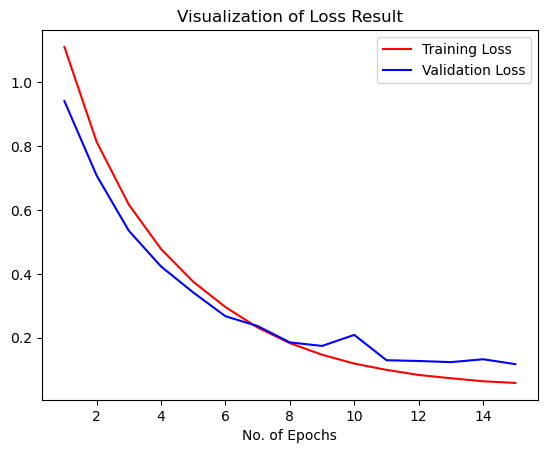

In [41]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [43]:
test_set = validation_set = image_dataset_from_directory(
    '/Users/cartneyhlauffin/Downloads/Dataset - train+val+test/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [45]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

171/171 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - accuracy: 0.9722 - f1_score: 0.9502 - loss: 0.1153


In [47]:
test_loss

0.12390299886465073

In [49]:
test_acc

0.9714625477790833

In [51]:
f1_score

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9770023 , 0.95522386, 0.8761114 , 0.9865505 ], dtype=float32)>

In [53]:
model = tf.keras.models.load_model("Trained_Model.keras")

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,485,510 (62.89 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 10,974,074 (41.86 MB)

In [57]:
test_set = validation_set = image_dataset_from_directory(
    '/Users/cartneyhlauffin/Downloads/Dataset - train+val+test/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [59]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2025-07-31 19:37:41.352955: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [61]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [63]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

171/171 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step


In [65]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [67]:
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3746
           1       0.97      0.94      0.96      1161
           2       0.92      0.83      0.88       887
           3       0.98      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.96      0.94      0.95     10933
weighted avg       0.97      0.97      0.97     10933



In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3696,   11,   36,    3],
       [  25, 1088,    5,   43],
       [  93,    3,  739,   52],
       [   6,   15,   20, 5098]])

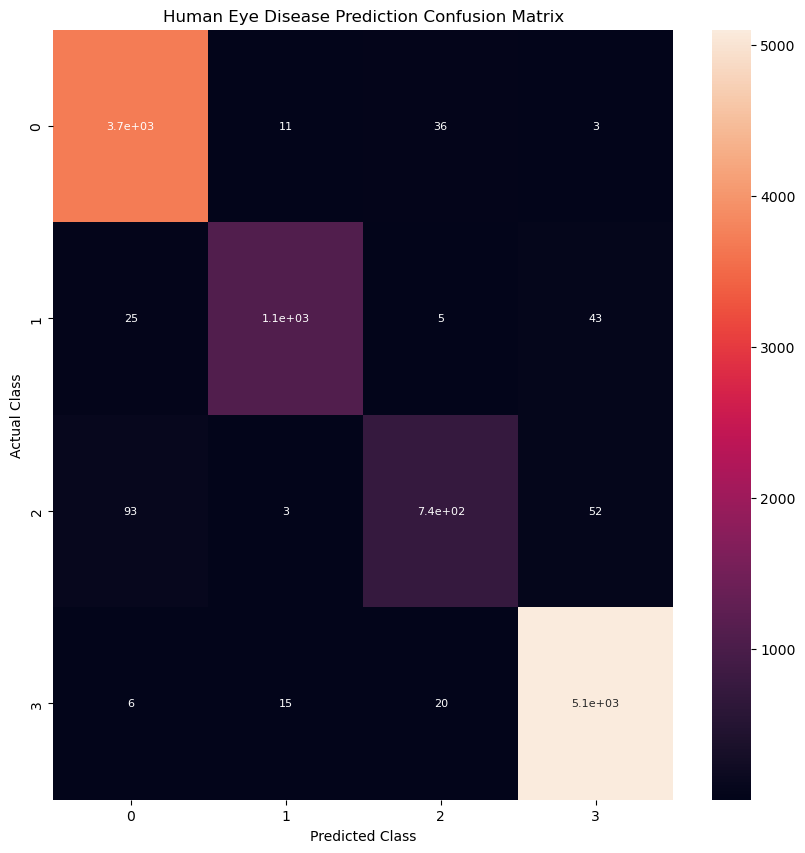

In [73]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()